# Импорт библиотек

In [29]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# Настройка CometML
<img src='https://camo.githubusercontent.com/b35adf34bc440ea2ac19bb0d3432f48e26d71ab8e4c256e936b709eec44f5b19/68747470733a2f2f7777772e636f6d65742e6d6c2f696d616765732f6c6f676f5f636f6d65745f6c696768742e706e67' width=500px>

In [30]:
from comet_ml import Experiment

In [31]:
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="qIFBHKLfo88uBxDf0yV5XYzi0",
    project_name="medical-appointment",
    workspace="govoridaa",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/govoridaa/medical-appointment/f1b473330a3a42f6b5029f77cf39aec6



# Загрузка данных

In [32]:
df = pd.read_csv("C:\SkillFactory\учебный материал\data\KaggleV2-May-2016.csv")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\govor\AppData\Local\Temp\ipykernel_7592\3149325485.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("C:\SkillFactory\учебный материал\data\KaggleV2-May-2016.csv")


In [33]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Визуализация

### Распределение числовых признаков

{'web': 'https://www.comet.com/api/image/download?imageId=1c1b011a5e2741e19f95cb0c89061444&experimentKey=f1b473330a3a42f6b5029f77cf39aec6',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=1c1b011a5e2741e19f95cb0c89061444&experimentKey=f1b473330a3a42f6b5029f77cf39aec6',
 'imageId': '1c1b011a5e2741e19f95cb0c89061444'}

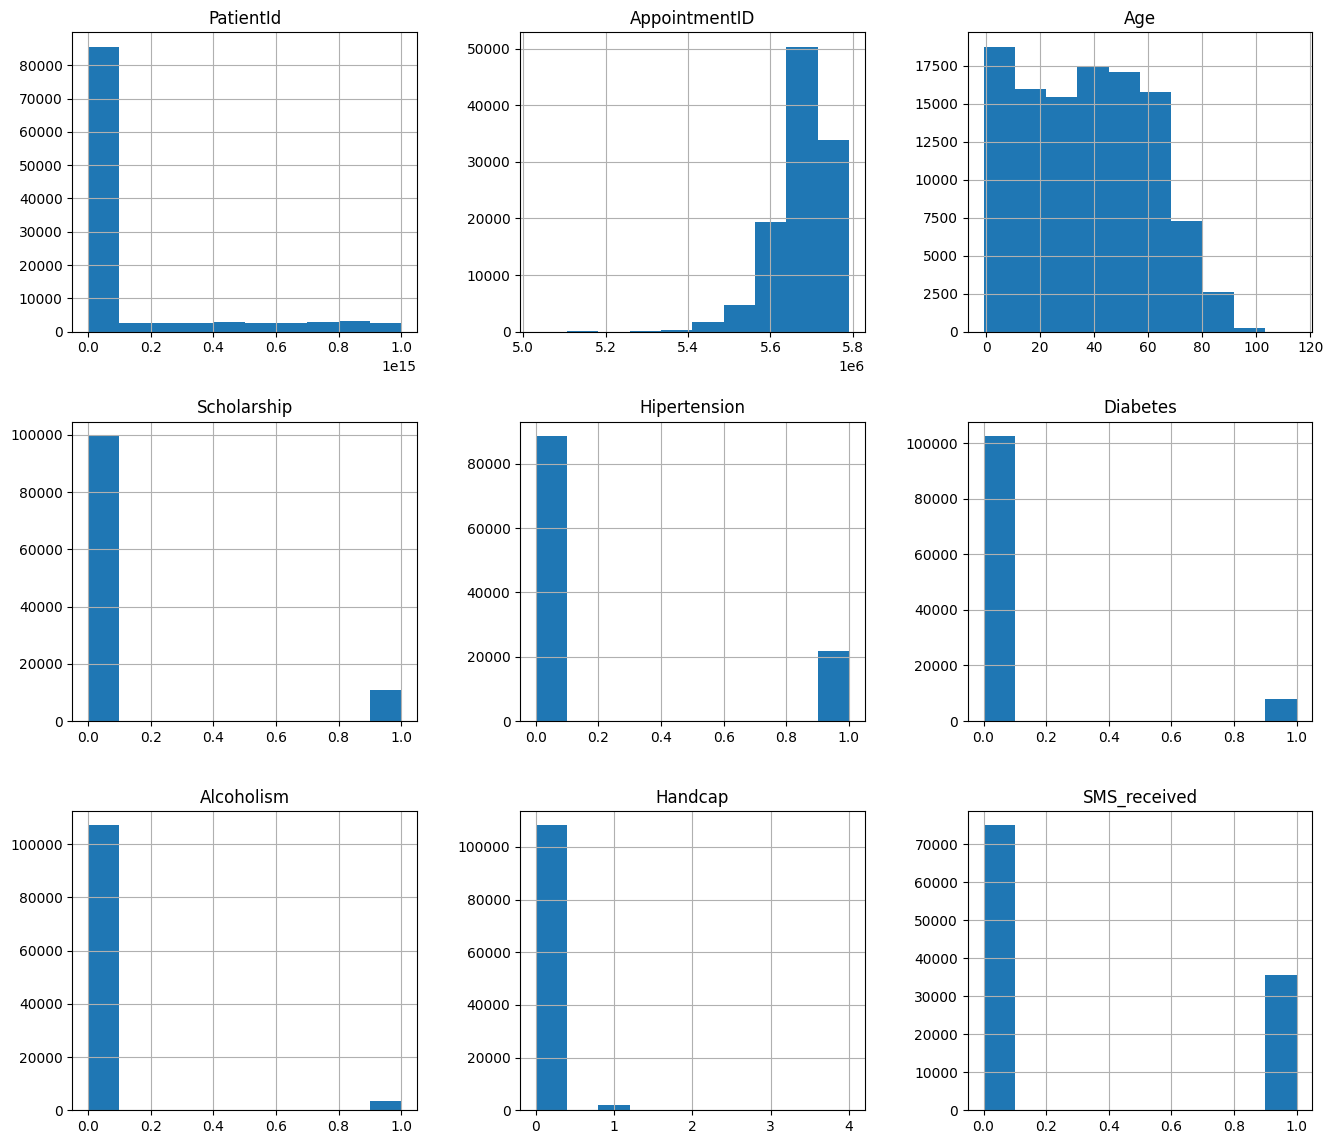

In [34]:
df.hist(figsize=(16,14));
#логируем гистограмму
experiment.log_figure(figure=plt)

In [35]:
numeric_data=df.copy()
numeric_data.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show', 'Neighbourhood', 'SMS_received'], axis=1, inplace=True)
numeric_data['Gender']=numeric_data['Gender'].replace({'F':2, 'M':1})
display(numeric_data)

C:\Users\govor\AppData\Local\Temp\ipykernel_7592\408243339.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_data['Gender']=numeric_data['Gender'].replace({'F':2, 'M':1})


,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap
0,2,62,0,1,0,0,0
1,1,56,0,0,0,0,0
2,2,62,0,0,0,0,0
3,2,8,0,0,0,0,0
4,2,56,0,1,1,0,0
...,...,...,...,...,...,...,...
110522,2,56,0,0,0,0,0
110523,2,51,0,0,0,0,0
110524,2,21,0,0,0,0,0
110525,2,38,0,0,0,0,0


{'web': 'https://www.comet.com/api/image/download?imageId=b357d39c00fc42138fd1f6bd71b430ae&experimentKey=f1b473330a3a42f6b5029f77cf39aec6',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=b357d39c00fc42138fd1f6bd71b430ae&experimentKey=f1b473330a3a42f6b5029f77cf39aec6',
 'imageId': 'b357d39c00fc42138fd1f6bd71b430ae'}

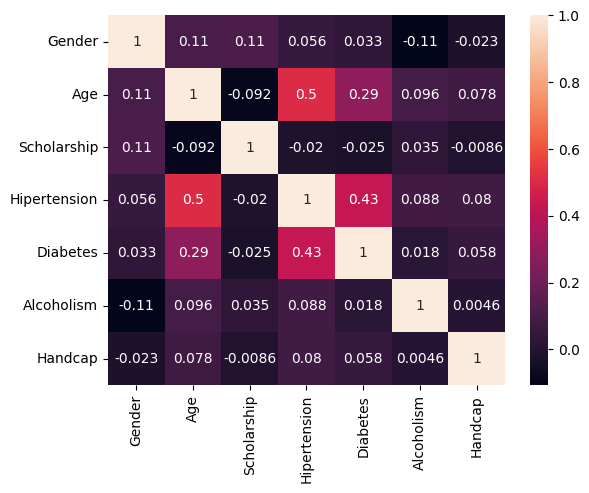

In [39]:
sns.heatmap(numeric_data.corr(numeric_only=True), annot=True)
experiment.log_figure()